<a href="https://colab.research.google.com/github/bmines/bmines/blob/main/Untitled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
x = pd.read_csv("/content/titanic-passengers.csv",sep = ";")
x.head()

PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0          343       No       2  ...  13.0000    NaN         S
1           76       No       3  ...   7.6500  F G73         S
2          641       No       3  ...   7.8542    NaN         S
3          568       No       3  ...  21.0750    NaN         S
4          672       No       1  ...  52.0000    B71         S

[5 rows x 12 columns]

In [2]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
print(x.head())
print(x.head().isnull())

   PassengerId Survived  Pclass  ...     Fare  Cabin  Embarked
0          343       No       2  ...  13.0000    NaN         S
1           76       No       3  ...   7.6500  F G73         S
2          641       No       3  ...   7.8542    NaN         S
3          568       No       3  ...  21.0750    NaN         S
4          672       No       1  ...  52.0000    B71         S

[5 rows x 12 columns]
   PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0        False     False   False  False  ...   False  False   True     False
1        False     False   False  False  ...   False  False  False     False
2        False     False   False  False  ...   False  False   True     False
3        False     False   False  False  ...   False  False   True     False
4        False     False   False  False  ...   False  False  False     False

[5 rows x 12 columns]


In [4]:
x.drop("Cabin", axis=1, inplace=True)

In [5]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
x.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [7]:
x["Age"].fillna(x["Age"].mean(), inplace=True)
x.tail()

PassengerId Survived  Pclass  ...  Ticket     Fare  Embarked
886           10      Yes       2  ...  237736  30.0708         C
887           61       No       3  ...    2669   7.2292         C
888          535       No       3  ...  315084   8.6625         S
889          102       No       3  ...  349215   7.8958         S
890          428      Yes       2  ...  250655  26.0000         S

[5 rows x 11 columns]

In [8]:
x["Embarked"].isna().sum()

2

In [9]:
x["Embarked"].fillna("S", inplace=True)

In [10]:
x.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

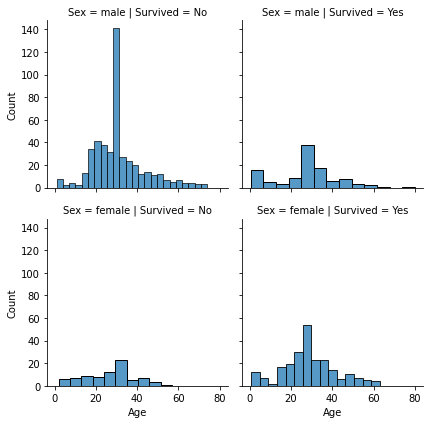

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
grid = sns.FacetGrid(x, row="Sex", col="Survived",)
grid.map(sns.histplot, "Age")
grid.add_legend()

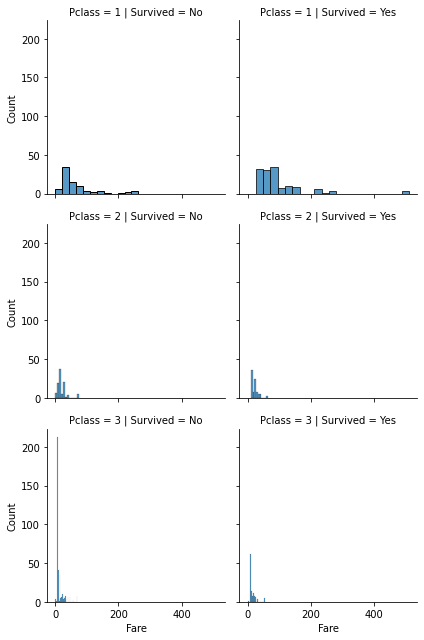

In [12]:
grid = sns.FacetGrid(x, row="Pclass", col="Survived")
grid.map(sns.histplot, "Fare")

In [13]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    

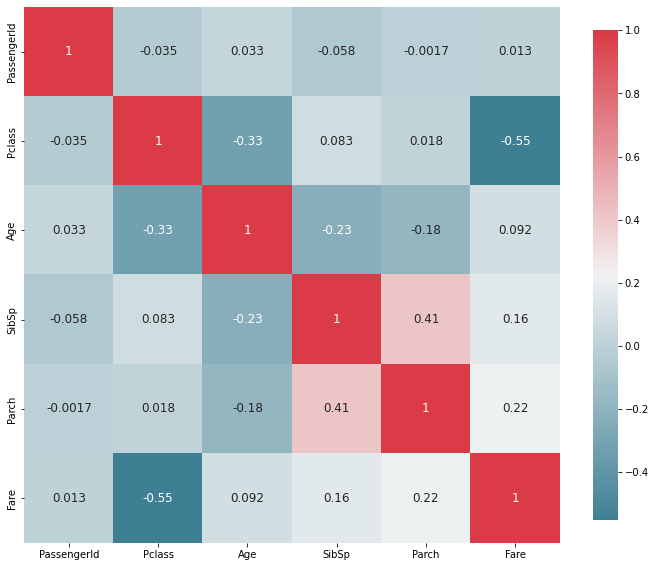

In [14]:
plot_correlation_map(x)

moderate positive correlation between Patch and SibSp.

moderate negative correlation btw:
*   Pclass and Fare
*   Pclass and Age

weak negative correlation btw: 
*   SibSp and Age
*   Age and Parch
*   Parch and Fare
*   SibSp and Fare

(almost) no correlation btw:
*   PassengerID and Fare
*   PassengerID and Pclass
*   PassengerID and Age
*   PassengerID and SibSP
*   PassengerID and Parch
*   Age and Fare
*   Pclass and SibSP
*   Pclass and Parch



In [15]:
cleanup = {"Survived": {"Yes": 1, "No": 0}}
x.replace(cleanup, inplace = True)
x[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True ).mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

undropped name

In [16]:
Title_Dictionary = {  "Capt": "Officer", "Col": "Officer",  "Major": "Officer",  "Dr":  "Officer",  "Rev": "Officer", "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",  "Donna" : "Royalty", 

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [17]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""


x["Title"] = x["Name"].apply(get_title)  
x

PassengerId  Survived  Pclass  ...     Fare Embarked  Title
0            343         0       2  ...  13.0000        S     Mr
1             76         0       3  ...   7.6500        S     Mr
2            641         0       3  ...   7.8542        S     Mr
3            568         0       3  ...  21.0750        S    Mrs
4            672         0       1  ...  52.0000        S     Mr
..           ...       ...     ...  ...      ...      ...    ...
886           10         1       2  ...  30.0708        C    Mrs
887           61         0       3  ...   7.2292        C     Mr
888          535         0       3  ...   8.6625        S   Miss
889          102         0       3  ...   7.8958        S     Mr
890          428         1       2  ...  26.0000        S   Miss

[891 rows x 12 columns]

In [18]:
one_hot = pd.get_dummies(x["Title"])
x = x.drop("Title", axis = 1)
y = x.join(one_hot)
y

PassengerId  Survived  Pclass  ... Ms Rev  Sir
0            343         0       2  ...  0   0    0
1             76         0       3  ...  0   0    0
2            641         0       3  ...  0   0    0
3            568         0       3  ...  0   0    0
4            672         0       1  ...  0   0    0
..           ...       ...     ...  ... ..  ..  ...
886           10         1       2  ...  0   0    0
887           61         0       3  ...  0   0    0
888          535         0       3  ...  0   0    0
889          102         0       3  ...  0   0    0
890          428         1       2  ...  0   0    0

[891 rows x 28 columns]

In [19]:
z = y.drop("Name", axis = 1)
z

PassengerId  Survived  Pclass     Sex        Age  ...  Mr  Mrs Ms  Rev Sir
0            343         0       2    male  28.000000  ...   1    0  0    0   0
1             76         0       3    male  25.000000  ...   1    0  0    0   0
2            641         0       3    male  20.000000  ...   1    0  0    0   0
3            568         0       3  female  29.000000  ...   0    1  0    0   0
4            672         0       1    male  31.000000  ...   1    0  0    0   0
..           ...       ...     ...     ...        ...  ...  ..  ... ..  ...  ..
886           10         1       2  female  14.000000  ...   0    1  0    0   0
887           61         0       3    male  22.000000  ...   1    0  0    0   0
888          535         0       3  female  30.000000  ...   0    0  0    0   0
889          102         0       3    male  29.699118  ...   1    0  0    0   0
890          428         1       2  female  19.000000  ...   0    0  0    0   0

[891 rows x 27 columns]

In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

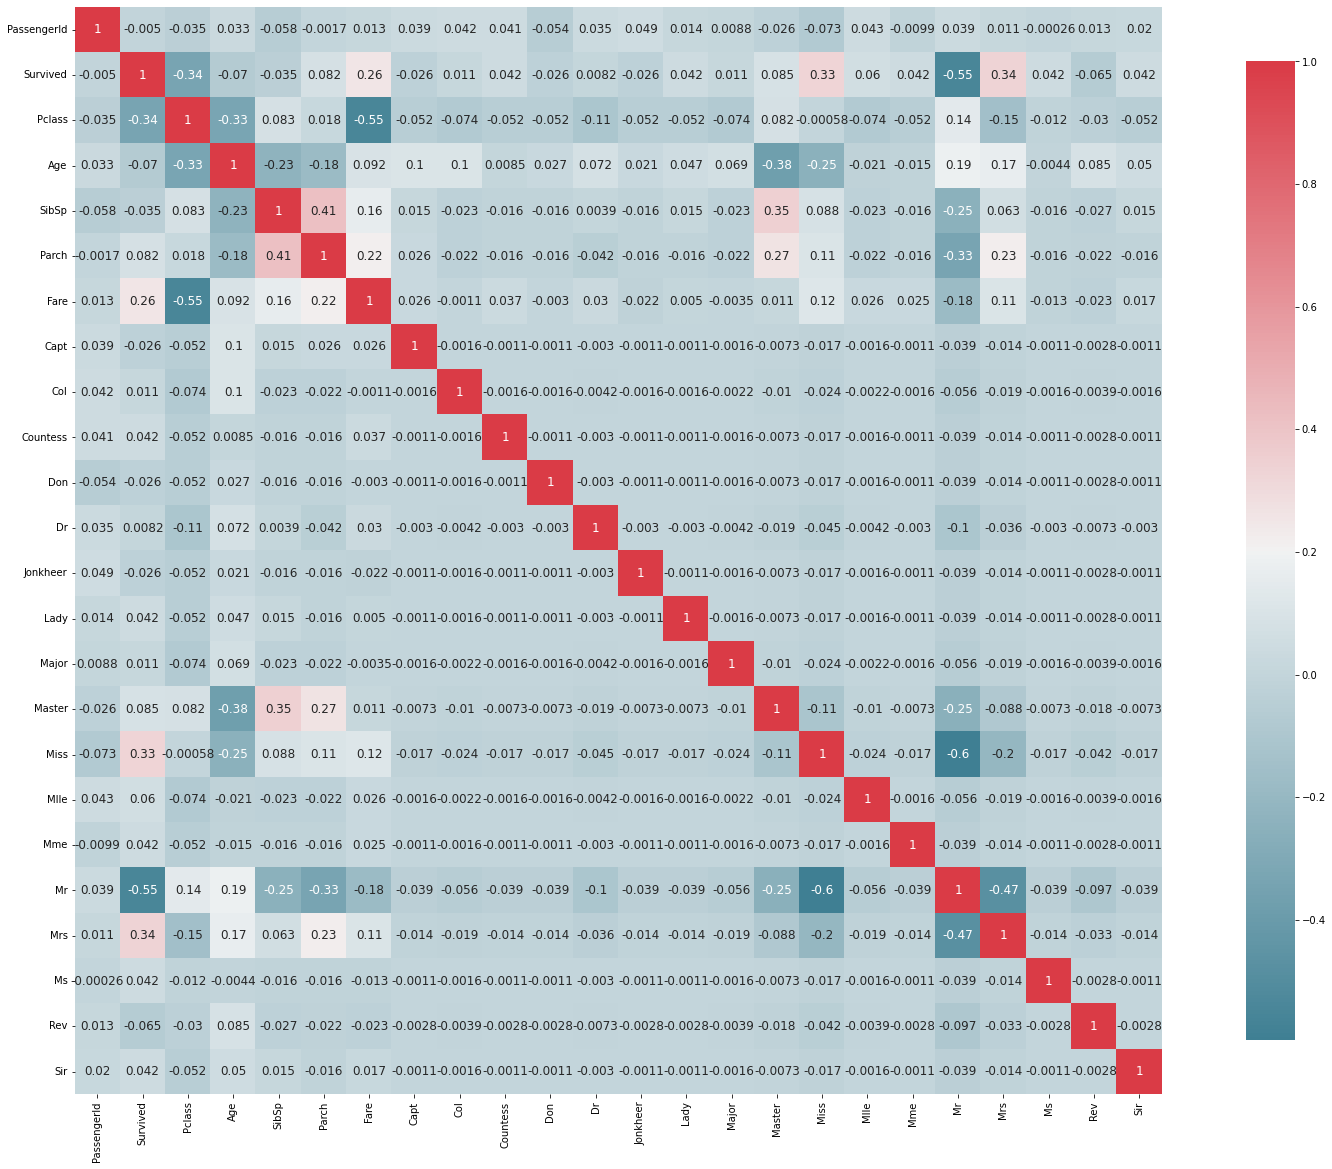

In [21]:
plot_correlation_map(z)

In [22]:
z["FamilySize"] = z["Parch"] + z["SibSp"]
z

PassengerId  Survived  Pclass     Sex  ...  Ms  Rev  Sir FamilySize
0            343         0       2    male  ...   0    0    0          0
1             76         0       3    male  ...   0    0    0          0
2            641         0       3    male  ...   0    0    0          0
3            568         0       3  female  ...   0    0    0          4
4            672         0       1    male  ...   0    0    0          1
..           ...       ...     ...     ...  ...  ..  ...  ...        ...
886           10         1       2  female  ...   0    0    0          1
887           61         0       3    male  ...   0    0    0          0
888          535         0       3  female  ...   0    0    0          0
889          102         0       3    male  ...   0    0    0          0
890          428         1       2  female  ...   0    0    0          0

[891 rows x 28 columns]

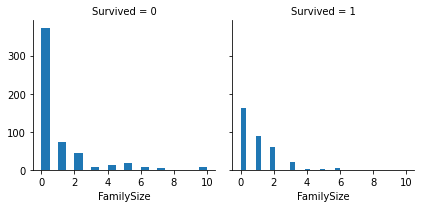

In [23]:
w = sns.FacetGrid(z, col = "Survived")
w.map(plt.hist, "FamilySize", bins = 20)